# LSTM

## Preparación de ambiente

### Carga de módulos

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data visualization
import cufflinks as cf

# Modeling
from keras import metrics
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Environment setup
cf.go_offline()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

2025-03-06 15:52:01.836154: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 15:52:01.837486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 15:52:01.864368: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 15:52:01.865155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 15:52:02.362159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Data Wrangling

### Lectura de datos

In [2]:
df = pd.read_excel("/home/oscar/Downloads/Consulta_20250306-124152785.xlsx", skiprows=9)

/home/oscar/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [3]:
df.head()

,Título,Total de monto operado a través de tarjetas,Monto operado a través de tarjetas de débito,Monto operado a través de tarjetas de crédito,Total de monto operado a través de tarjetas en Agencias de Viajes,Monto operado a través de tarjetas de débito en Agencias de Viajes,Monto operado a través de tarjetas de crédito en Agencias de Viajes,Total de monto operado a través de tarjetas en Agregadores,Monto operado a través de tarjetas de débito en Agregadores,Monto operado a través de tarjetas de crédito en Agregadores,...,Monto operado a través de tarjetas de crédito en Telecomunicaciones,Total de monto operado a través de tarjetas en Transporte Aéreo,Monto operado a través de tarjetas de débito en Transporte Aéreo,Monto operado a través de tarjetas de crédito en Transporte Aéreo,Total de monto operado a través de tarjetas en Transporte Terrestre de Pasajeros,Monto operado a través de tarjetas de débito en Transporte Terrestre de Pasajeros,Monto operado a través de tarjetas de crédito en Transporte Terrestre de Pasajeros,Total de monto operado a través de tarjetas en Ventas al detalle (Retail),Monto operado a través de tarjetas de débito en Ventas al detalle (Retail),Monto operado a través de tarjetas de crédito en Ventas al detalle (Retail)
0,Periodo disponible,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,...,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025,01/12/2022 - 31/01/2025
1,Periodicidad,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,...,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria,Diaria
2,Cifra,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,...,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos,Flujos
3,Unidad,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,...,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos,Pesos
4,Base,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Título', 'Total de monto operado a través de tarjetas',
       'Monto operado a través de tarjetas de débito',
       'Monto operado a través de tarjetas de crédito',
       'Total de monto operado a través de tarjetas en Agencias de Viajes',
       'Monto operado a través de tarjetas de débito en Agencias de Viajes',
       'Monto operado a través de tarjetas de crédito en Agencias de Viajes',
       'Total de monto operado a través de tarjetas en Agregadores',
       'Monto operado a través de tarjetas de débito en Agregadores',
       'Monto operado a través de tarjetas de crédito en Agregadores',
       'Total de monto operado a través de tarjetas en Aseguradoras',
       'Monto operado a través de tarjetas de débito en Aseguradoras',
       'Monto operado a través de tarjetas de crédito en Aseguradoras',
       'Total de monto operado a través de tarjetas en Beneficencia',
       'Monto operado a través de tarjetas de débito en Beneficencia',
       'Monto operado a través

In [5]:
df = df.drop(list(range(8)))[df.columns[:4]]

In [6]:
df.columns = ["fecha", "monto_total", "monto_debito", "monto_credito"]

### EDA

In [7]:
df.head()

,fecha,monto_total,monto_debito,monto_credito
8,2022-12-01 00:00:00,13806840974,8459055283,5347785691
9,2022-12-02 00:00:00,14307467872,8740334278,5567133594
10,2022-12-03 00:00:00,13584789753,8473881502,5110908251
11,2022-12-04 00:00:00,13094839773,8476524693,4618315081
12,2022-12-05 00:00:00,12597611807,7892626757,4704985050


### Cambio de tipo de dato

In [8]:
df["fecha"] = pd.to_datetime(df["fecha"])

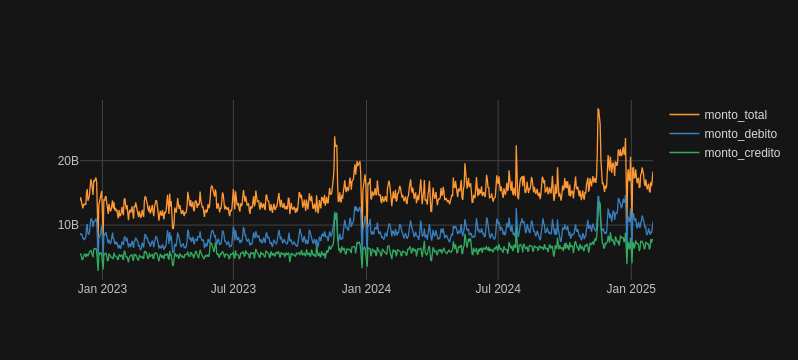

In [9]:
df.set_index("fecha").sort_index().iplot()

### Preprocesamiento

#### Filtrado de variables

In [10]:
df.corr()

,fecha,monto_total,monto_debito,monto_credito
fecha,1.00000,0.61825,0.55862,0.58930
monto_total,0.61825,1.00000,0.94551,0.89595
monto_debito,0.55862,0.94551,1.00000,0.70251
monto_credito,0.58930,0.89595,0.70251,1.00000


In [11]:
target = "monto_debito"

### Cambio de tipo de dato

In [12]:
df[target] = pd.to_numeric(df[target], errors="coerce")

In [13]:
df = df[["fecha", target]]

#### Creación de la target

In [14]:
df["y"] = df[target].shift(-1)

In [15]:
df

,fecha,monto_debito,y
8,2022-12-01,8459055283,8740334278.00000
9,2022-12-02,8740334278,8473881502.00000
10,2022-12-03,8473881502,8476524693.00000
11,2022-12-04,8476524693,7892626757.00000
12,2022-12-05,7892626757,7904856048.00000
...,...,...,...
796,2025-01-27,8529389504,8870086939.00000
797,2025-01-28,8870086939,8771634995.00000
798,2025-01-29,8771634995,9434415253.00000
799,2025-01-30,9434415253,10539773184.00000


In [16]:
df["fecha"].diff().mean()

Timedelta('1 days 00:00:00')

In [17]:
df.dropna(inplace=True)

### Train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[[target]].to_numpy(), df[["y"]].to_numpy(), shuffle=False)

In [19]:
X_test

array([[ 9978436664],
       [ 9290220441],
       [ 9017728563],
       [10021965892],
       [ 9070638432],
       [ 8454319861],
       [ 8836418359],
       [ 8296506114],
       [ 8066883126],
       [12650376436],
       [ 9276436332],
       [ 8628253968],
       [ 8161727762],
       [ 9060031341],
       [ 9669219360],
       [10279000000],
       [10524000000],
       [11051000000],
       [10306000000],
       [10587000000],
       [10420000000],
       [ 8762337283],
       [ 8760423792],
       [ 8999086621],
       [10168000000],
       [ 9746412021],
       [ 9006164393],
       [ 8891953049],
       [ 8799316738],
       [ 9511969210],
       [10714000000],
       [10477000000],
       [ 9597823718],
       [ 9011146000],
       [ 9120905565],
       [ 8483974518],
       [ 8249834348],
       [ 8617886365],
       [ 9132984083],
       [ 8722417484],
       [ 8285066342],
       [ 8237592940],
       [ 7624545354],
       [ 8270268867],
       [ 9245664300],
       [10

In [20]:
X_train.shape

(594, 1)

In [21]:
X_test.shape

(198, 1)

### Escalamiento de datos

In [22]:
sc = MinMaxScaler()

In [23]:
sc.fit(X_train)

MinMaxScaler()

In [24]:
X_train, X_test, y_train, y_test = [sc.transform(x) for x in [X_train, X_test, y_train, y_test]]

In [25]:
X_train.shape

(594, 1)

In [26]:
X_train.max()

0.9999999999999999

In [27]:
X_test.max()

1.218907319908952

### Preparación de sets

In [28]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [29]:
X_train.shape

(594, 1, 1)

## Modelado

### Base de modelo

In [30]:
model = Sequential()

### Long-short term memory

In [31]:
LSTM?

Init signature: LSTM(*args, **kwargs)
Docstring:     
Long Short-Term Memory layer - Hochreiter 1997.

See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
for details about the usage of RNN API.

Based on available runtime hardware and constraints, this layer
will choose different implementations (cuDNN-based or pure-TensorFlow)
to maximize the performance. If a GPU is available and all
the arguments to the layer meet the requirement of the cuDNN kernel
(see below for details), the layer will use a fast cuDNN implementation.

The requirements to use the cuDNN implementation are:

1. `activation` == `tanh`
2. `recurrent_activation` == `sigmoid`
3. `recurrent_dropout` == 0
4. `unroll` is `False`
5. `use_bias` is `True`
6. Inputs, if use masking, are strictly right-padded.
7. Eager execution is enabled in the outermost context.

For example:

>>> inputs = tf.random.normal([32, 10, 8])
>>> lstm = tf.keras.layers.LSTM(4)
>>> output = lstm(inputs)
>>> print(output.shape

In [32]:
model.add(LSTM(10, input_shape=(1, 1), activation="tanh"))

### Capa de salida

In [33]:
model.add(Dense(1))

### Configuración del modelo

#### Métricas de ajuste

In [34]:
kmetrics = [
    metrics.RootMeanSquaredError(name='rms'),
    metrics.MeanAbsoluteError(name='mae')
]   

#### Callbacks

In [35]:
early_stopping = EarlyStopping(monitor='val_mae', patience=20)

In [36]:
checkpoint = ModelCheckpoint('models/lstm/model_{val_mae:.3f}.h5',
                             save_best_only=True,
                             save_weights_only=False,
                             monitor='val_mae')

In [37]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=kmetrics)

### Entrenamiento

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/100
594/594 [==============================] - 2s 2ms/step - loss: 0.0274 - rms: 0.1654 - mae: 0.1202 - val_loss: 0.0355 - val_rms: 0.1883 - val_mae: 0.1352
Epoch 2/100
152/594 [======>.......................] - ETA: 0s - loss: 0.0125 - rms: 0.1117 - mae: 0.0880

/home/oscar/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



594/594 [==============================] - 1s 1ms/step - loss: 0.0114 - rms: 0.1067 - mae: 0.0823 - val_loss: 0.0214 - val_rms: 0.1464 - val_mae: 0.1015
Epoch 3/100
594/594 [==============================] - 1s 1ms/step - loss: 0.0096 - rms: 0.0982 - mae: 0.0744 - val_loss: 0.0189 - val_rms: 0.1373 - val_mae: 0.0946
Epoch 4/100
594/594 [==============================] - 1s 1ms/step - loss: 0.0090 - rms: 0.0948 - mae: 0.0711 - val_loss: 0.0199 - val_rms: 0.1410 - val_mae: 0.0969
Epoch 5/100
594/594 [==============================] - 1s 1ms/step - loss: 0.0088 - rms: 0.0937 - mae: 0.0698 - val_loss: 0.0178 - val_rms: 0.1335 - val_mae: 0.0910
Epoch 6/100
594/594 [==============================] - 1s 1ms/step - loss: 0.0088 - rms: 0.0937 - mae: 0.0692 - val_loss: 0.0196 - val_rms: 0.1401 - val_mae: 0.0960
Epoch 7/100
594/594 [==============================] - 1s 1ms/step - loss: 0.0088 - rms: 0.0938 - mae: 0.0701 - val_loss: 0.0206 - val_rms: 0.1436 - val_mae: 0.0991
Epoch 8/100
594/594 [=

### Análisis de resultados

In [39]:
results = pd.DataFrame(history.history)

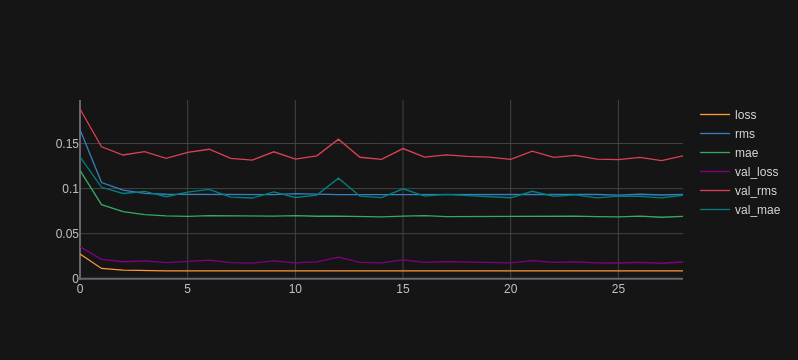

In [40]:
results.iplot()

### Predicción

In [41]:
df["y_hat"] = sc.inverse_transform(model.predict(sc.transform(df[[target]].to_numpy()).reshape(df.shape[0], 1, 1))).round(0) 

25/25 [==============================] - 0s 806us/step


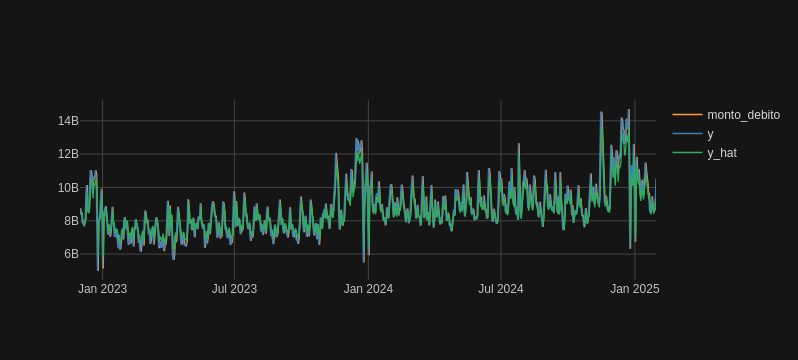

In [42]:
df.set_index("fecha").iplot()

## Plan B

### Tendencia

In [43]:
linreg = LinearRegression()

In [44]:
df["t"] = df.index

In [45]:
linreg.fit(df[["t"]], df[[target]])

LinearRegression()

In [46]:
linreg.coef_

array([[3650847.96179687]])

In [47]:
df["trend"] = linreg.predict(df[["t"]])

In [48]:
df

,fecha,monto_debito,y,y_hat,t,trend
8,2022-12-01,8459055283,8740334278.00000,8356694528.00000,8,7272028568.02095
9,2022-12-02,8740334278,8473881502.00000,8584555008.00000,9,7275679415.98275
10,2022-12-03,8473881502,8476524693.00000,8368632320.00000,10,7279330263.94455
11,2022-12-04,8476524693,7892626757.00000,8370761216.00000,11,7282981111.90634
12,2022-12-05,7892626757,7904856048.00000,7907157504.00000,12,7286631959.86814
...,...,...,...,...,...,...
795,2025-01-26,8994022076,8529389504.00000,8792461312.00000,795,10145245913.95509
796,2025-01-27,8529389504,8870086939.00000,8413399040.00000,796,10148896761.91689
797,2025-01-28,8870086939,8771634995.00000,8690619392.00000,797,10152547609.87868
798,2025-01-29,8771634995,9434415253.00000,8610087936.00000,798,10156198457.84048


In [49]:
df["y_notrend"] = df[target] - df["trend"]

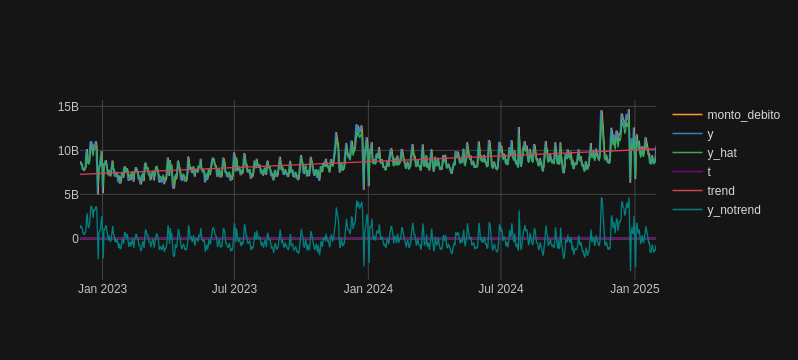

In [50]:
df.set_index("fecha").iplot()

In [51]:
df.describe()

,fecha,monto_debito,y,y_hat,t,trend,y_notrend
count,792,792.00000,792.00000,792.00000,792.00000,792.00000,792.00000
mean,2023-12-31 12:00:00,8715938936.91162,8718566105.97853,8599074816.00000,403.50000,8715938936.91162,0.00000
min,2022-12-01 00:00:00,4985102466.00000,4985102466.00000,5849902592.00000,8.00000,7272028568.02095,-3707421689.13939
25%,2023-06-16 18:00:00,7705881323.00000,7705881323.00000,7761905408.00000,205.75000,7993983752.46628,-858957855.45937
50%,2023-12-31 12:00:00,8492862166.50000,8493167489.00000,8383927296.00000,403.50000,8715938936.91161,-246876656.31505
75%,2024-07-16 06:00:00,9453221796.75000,9455347050.50000,9174044928.00000,601.25000,9437894121.35695,547853851.66594
max,2025-01-30 00:00:00,14707263661.00000,14707263661.00000,13738722304.00000,799.00000,10159849305.80228,4682495729.78421
std,NaN,1498061728.62803,1499434520.25053,1235246848.00000,228.77500,835222737.47313,1243620489.37283


### Preparación de sets

In [52]:
df["y_trendless"] = df["y_notrend"].shift(-1)

In [53]:
df

,fecha,monto_debito,y,y_hat,t,trend,y_notrend,y_trendless
8,2022-12-01,8459055283,8740334278.00000,8356694528.00000,8,7272028568.02095,1187026714.97905,1464654862.01725
9,2022-12-02,8740334278,8473881502.00000,8584555008.00000,9,7275679415.98275,1464654862.01725,1194551238.05545
10,2022-12-03,8473881502,8476524693.00000,8368632320.00000,10,7279330263.94455,1194551238.05545,1193543581.09366
11,2022-12-04,8476524693,7892626757.00000,8370761216.00000,11,7282981111.90634,1193543581.09366,605994797.13186
12,2022-12-05,7892626757,7904856048.00000,7907157504.00000,12,7286631959.86814,605994797.13186,614573240.17006
...,...,...,...,...,...,...,...,...
795,2025-01-26,8994022076,8529389504.00000,8792461312.00000,795,10145245913.95509,-1151223837.95509,-1619507257.91689
796,2025-01-27,8529389504,8870086939.00000,8413399040.00000,796,10148896761.91689,-1619507257.91689,-1282460670.87868
797,2025-01-28,8870086939,8771634995.00000,8690619392.00000,797,10152547609.87868,-1282460670.87868,-1384563462.84048
798,2025-01-29,8771634995,9434415253.00000,8610087936.00000,798,10156198457.84048,-1384563462.84048,-725434052.80228


In [54]:
df.dropna(inplace=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[["y_notrend"]].to_numpy(), df[["y_trendless"]].to_numpy(), shuffle=False)

In [56]:
sc = MinMaxScaler()

In [57]:
sc.fit(X_train)

MinMaxScaler()

In [58]:
X_train, X_test, y_train, y_test = [sc.transform(x) for x in [X_train, X_test, y_train, y_test]]

In [59]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

### Entrenamiento

In [60]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, 1), activation="tanh"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1))

In [61]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=kmetrics)

In [62]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/100
593/593 [==============================] - 2s 2ms/step - loss: 0.0239 - rms: 0.1503 - mae: 0.1101 - val_loss: 0.0369 - val_rms: 0.1921 - val_mae: 0.1427
Epoch 2/100
593/593 [==============================] - 1s 2ms/step - loss: 0.0175 - rms: 0.1325 - mae: 0.1013 - val_loss: 0.0250 - val_rms: 0.1581 - val_mae: 0.1230
Epoch 3/100
593/593 [==============================] - 1s 2ms/step - loss: 0.0119 - rms: 0.1092 - mae: 0.0846 - val_loss: 0.0193 - val_rms: 0.1388 - val_mae: 0.1016
Epoch 4/100
593/593 [==============================] - 1s 2ms/step - loss: 0.0100 - rms: 0.1002 - mae: 0.0752 - val_loss: 0.0184 - val_rms: 0.1357 - val_mae: 0.0960
Epoch 5/100
593/593 [==============================] - 1s 2ms/step - loss: 0.0099 - rms: 0.0993 - mae: 0.0743 - val_loss: 0.0211 - val_rms: 0.1451 - val_mae: 0.0991
Epoch 6/100
593/593 [==============================] - 1s 1ms/step - loss: 0.0099 - rms: 0.0996 - mae: 0.0751 - val_loss: 0.0184 - val_rms: 0.1356 - val_mae: 0.0948
Epoch 7/10

### Análisis de resultados

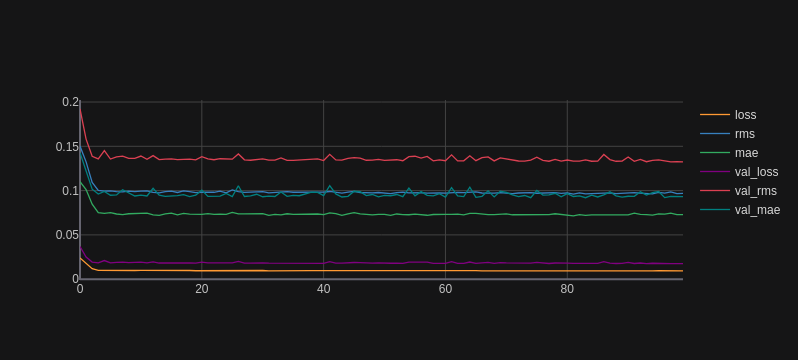

In [63]:
results = pd.DataFrame(history.history)
results.iplot()

In [64]:
df["y_hat_notrend"] = sc.inverse_transform(model.predict(sc.transform(df[["y_notrend"]].to_numpy()).reshape(df.shape[0], 1, 1))).round(0) 

25/25 [==============================] - 0s 623us/step


In [65]:
df

,fecha,monto_debito,y,y_hat,t,trend,y_notrend,y_trendless,y_hat_notrend
8,2022-12-01,8459055283,8740334278.00000,8356694528.00000,8,7272028568.02095,1187026714.97905,1464654862.01725,756000256.00000
9,2022-12-02,8740334278,8473881502.00000,8584555008.00000,9,7275679415.98275,1464654862.01725,1194551238.05545,1004487424.00000
10,2022-12-03,8473881502,8476524693.00000,8368632320.00000,10,7279330263.94455,1194551238.05545,1193543581.09366,762602304.00000
11,2022-12-04,8476524693,7892626757.00000,8370761216.00000,11,7282981111.90634,1193543581.09366,605994797.13186,761717312.00000
12,2022-12-05,7892626757,7904856048.00000,7907157504.00000,12,7286631959.86814,605994797.13186,614573240.17006,270671328.00000
...,...,...,...,...,...,...,...,...,...
794,2025-01-25,9470087185,8994022076.00000,9188178944.00000,794,10141595065.99329,-671507880.99329,-1151223837.95509,-599011520.00000
795,2025-01-26,8994022076,8529389504.00000,8792461312.00000,795,10145245913.95509,-1151223837.95509,-1619507257.91689,-844152320.00000
796,2025-01-27,8529389504,8870086939.00000,8413399040.00000,796,10148896761.91689,-1619507257.91689,-1282460670.87868,-1035139776.00000
797,2025-01-28,8870086939,8771634995.00000,8690619392.00000,797,10152547609.87868,-1282460670.87868,-1384563462.84048,-902637248.00000


In [66]:
df["y_hat_notrend"] += df["trend"]

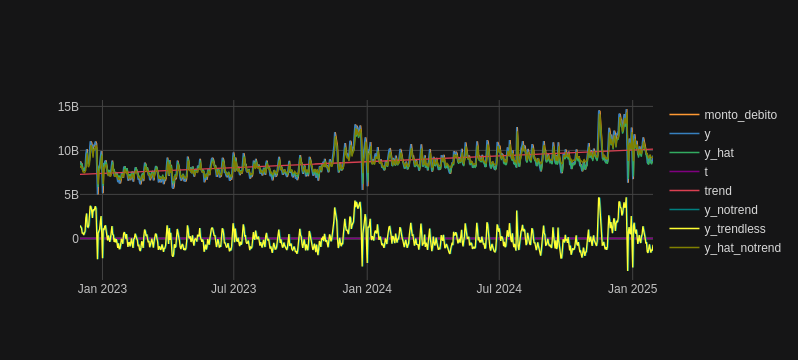

In [67]:
df.set_index("fecha").iplot()

### Comparativa de resultados

#### Con tendencia

In [68]:
mean_absolute_error(y_pred=df["y_hat"], y_true=df["y"])

588947789.8040456

In [69]:
mean_absolute_percentage_error(y_pred=df["y_hat"], y_true=df["y"])

0.06711287843799094

In [70]:
"{:,.5%}".format(mean_absolute_percentage_error(y_pred=df["y_hat"], y_true=df["y"]))

'6.71129%'

#### Sin tendencia

In [71]:
mean_absolute_error(y_pred=df["y_hat_notrend"], y_true=df["y"])

570700396.939555

In [72]:
"{:,.5%}".format(mean_absolute_percentage_error(y_pred=df["y_hat_notrend"], y_true=df["y"]))

'6.53975%'